# PubTabNet Dataset
PubTabNet is a large dataset for image-based table recognition, containing 568k+ images of tabular data annotated with the corresponding HTML representation of the tables.

The dataset is open sourced by IBM Research Australia and is available to download freely on the IBM Developer website: https://developer.ibm.com/exchanges/data/all/pubtabnet/.


In [ ]:
# importing prerequisites
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

## Download and Extract the Dataset
Since the dataset is large (~12GB), here we will be downloading a small subset of the data and extract it.

In [ ]:
# Link to the complete dataset: https://dax-cdn.cdn.appdomain.cloud/dax-pubtabnet/2.0.0/pubtabnet.tar.gz
fname = 'examples.tar.gz'
drive_path = '/content/drive/MyDrive/neural_networks_ocr_project/neural_networks_seminar/data/example_PubTabNet/'
drive_fname_path = drive_path + fname
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-pubtabnet/1.0.0/' + fname



In [ ]:
r = requests.get(url)
open(drive_fname_path, 'wb').write(r.content)

In [ ]:
# Extracting the dataset
tar = tarfile.open(drive_fname_path)
tar.extractall(drive_path)
tar.close()

In [ ]:
# Verifying the file was extracted properly
path.exists(drive_fname_path)

True

## Visualizing the Data
In this section, we visualize the raw image and extract it's HTML annotation from the JSON file. We further render the table using Jupyter notebook's inbuilt HTML capabilities.

In [ ]:
# Helper function to read in tables from the annotations
import re
from bs4 import BeautifulSoup as bs

def format_html(img):
    ''' Formats HTML code from tokenized annotation of img
    '''
    html_string = '''<html>
                     <head>
                     <meta charset="UTF-8">
                     <style>
                     table, th, td {
                       border: 1px solid black;
                       font-size: 10px;
                     }
                     </style>
                     </head>
                     <body>
                     <table frame="hsides" rules="groups" width="100%%">
                         %s
                     </table>
                     </body>
                     </html>''' % ''.join(img['html']['structure']['tokens'])
    cell_nodes = list(re.finditer(r'(<td[^<>]*>)(</td>)', html_string))
    assert len(cell_nodes) == len(img['html']['cells']), 'Number of cells defined in tags does not match the length of cells'
    cells = [''.join(c['tokens']) for c in img['html']['cells']]
    offset = 0
    for n, cell in zip(cell_nodes, cells):
        html_string = html_string[:n.end(1) + offset] + cell + html_string[n.start(2) + offset:]
        offset += len(cell)
    # prettify the html
    soup = bs(html_string)
    html_string = soup.prettify()
    return html_string

In [ ]:
# Loading the json annotations
with open(drive_path + 'examples/PubTabNet_Examples.json', 'r') as fp:
    annotations = json.load(fp)

FileNotFoundError: ignored

In [ ]:
# Inspecting the annotations
annotations.keys()

dict_keys(['images', 'dataset'])

In [ ]:
len(annotations['images'])

20

In [ ]:
annotations['images'][0].keys()

dict_keys(['filename', 'split', 'imgid', 'html', 'sentids'])

In [ ]:
annotations['images'][0]

{'filename': 'PMC4840965_004_00.png',
 'split': 'train',
 'imgid': 0,
 'html': {'cells': [{'tokens': ['<b>',
     'V',
     'a',
     'r',
     'i',
     'a',
     'b',
     'l',
     'e',
     '</b>']},
   {'tokens': ['<b>',
     'H',
     'a',
     'z',
     'a',
     'r',
     'd',
     ' ',
     'r',
     'a',
     't',
     'i',
     'o',
     '</b>']},
   {'tokens': ['<b>', '9', '5', ' ', '%', ' ', 'C', 'I', '</b>']},
   {'tokens': ['<b>',
     '<i>',
     'p',
     '</i>',
     ' ',
     'v',
     'a',
     'l',
     'u',
     'e',
     '*',
     '</b>']},
   {'tokens': ['A', 'g', 'e', ' ', '(', 'm', 'e', 'd', 'i', 'a', 'n', ')']},
   {'tokens': []},
   {'tokens': []},
   {'tokens': ['0', '.', '7', '1', '6']},
   {'tokens': [' ', '≤', '6', '9']},
   {'tokens': ['1', '.', '0', '0', '0']},
   {'tokens': []},
   {'tokens': []},
   {'tokens': [' ', '>', '6', '9']},
   {'tokens': ['0', '.', '8', '3', '9']},
   {'tokens': ['0', '.', '3', '1', '0', '–', '2', '.', '2', '6', '8']},
   {'

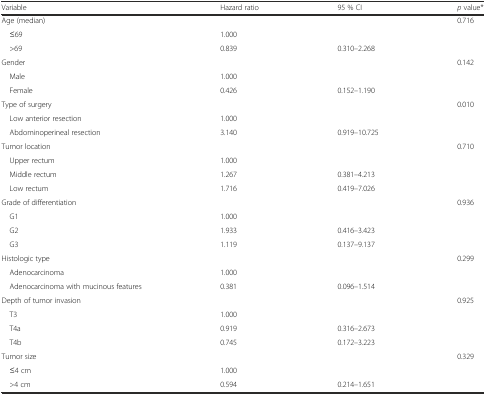

In [ ]:
# Showing the raw image
from IPython.display import Image as displayImage
filename = annotations['images'][0]['filename']
displayImage(drive_path + "examples/" + filename)

In [ ]:
# Extracting the HTML for the table from the annotation
html_string = format_html(annotations['images'][0])
print(html_string)

<html>
 <head>
  <meta charset="utf-8"/>
  <style>
   table, th, td {
                       border: 1px solid black;
                       font-size: 10px;
                     }
  </style>
 </head>
 <body>
  <table frame="hsides" rules="groups" width="100%">
   <thead>
    <tr>
     <td>
      <b>
       Variable
      </b>
     </td>
     <td>
      <b>
       Hazard ratio
      </b>
     </td>
     <td>
      <b>
       95 % CI
      </b>
     </td>
     <td>
      <b>
       <i>
        p
       </i>
       value*
      </b>
     </td>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      Age (median)
     </td>
     <td>
     </td>
     <td>
     </td>
     <td>
      0.716
     </td>
    </tr>
    <tr>
     <td>
      ≤69
     </td>
     <td>
      1.000
     </td>
     <td>
     </td>
     <td>
     </td>
    </tr>
    <tr>
     <td>
      &gt;69
     </td>
     <td>
      0.839
     </td>
     <td>
      0.310–2.268
     </td>
     <td>
     </td>
    </tr>
    <tr>
     

In [ ]:
# Rendering the above HTML in Jupyter Notebook for a more readable format
from IPython.core.display import display, HTML
display(HTML(html_string))